In [5]:
import pyvista as pv
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [6]:
CHERNOBYL_COORDS = (30.0927, 51.3870) # (Lon, lat) or (x, y)

MAP_SIZE_IN_DEGREES = (100, 50)

LOWER_LEFT_X_LON = CHERNOBYL_COORDS[0] - MAP_SIZE_IN_DEGREES[0]/2
LOWER_LEFT_Y_LAT = CHERNOBYL_COORDS[1] - MAP_SIZE_IN_DEGREES[1]/2
UPPER_LEFT_X_LON = CHERNOBYL_COORDS[0] + MAP_SIZE_IN_DEGREES[0]/2
UPPER_LEFT_Y_LAT = CHERNOBYL_COORDS[1] + MAP_SIZE_IN_DEGREES[1]/2

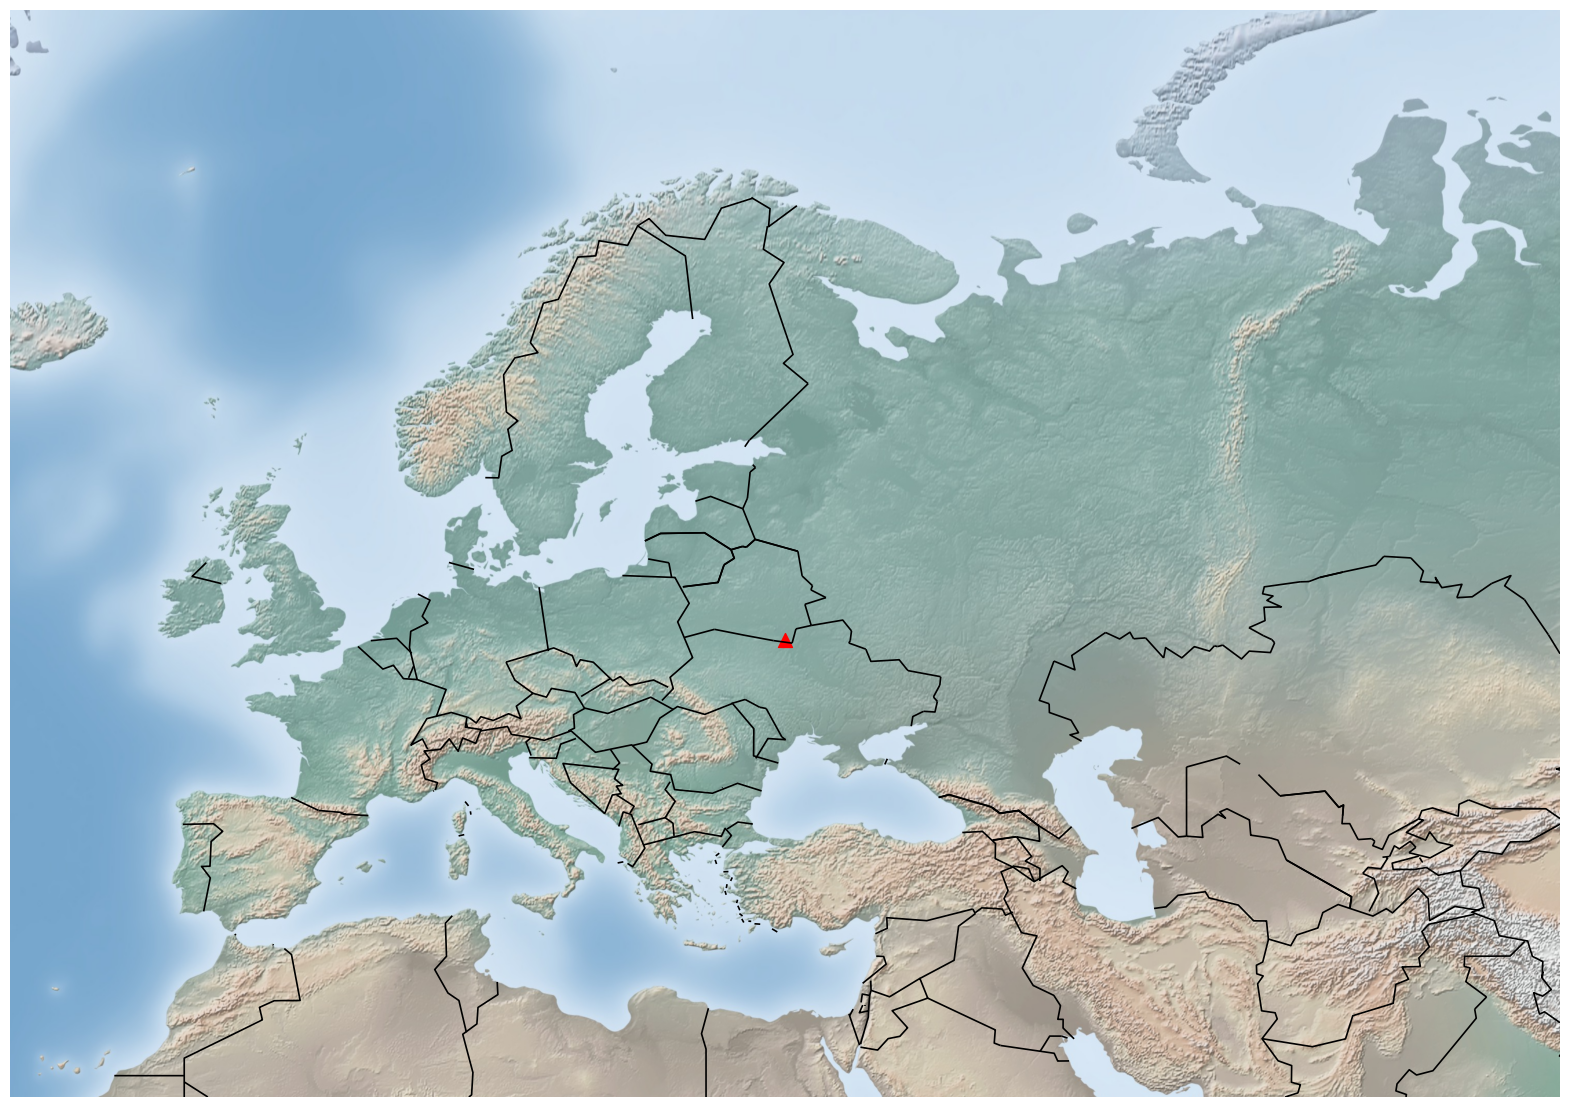

In [7]:
fig = plt.figure(frameon=False, figsize=(20,20))
ax = fig.add_subplot(1,1,1)

plt.axis("off")

m = Basemap(projection='mill',
            llcrnrlon=LOWER_LEFT_X_LON, # X axis for map is longitude
            llcrnrlat=LOWER_LEFT_Y_LAT, # Y axis for map is latitude
            urcrnrlon=UPPER_LEFT_X_LON, 
            urcrnrlat=UPPER_LEFT_Y_LAT,
            resolution="c") # c-crude, l-low, i-intermediate, h-high, f-full

m.shadedrelief() # makes it look pretty :)
m.drawcountries(linewidth=1.2)

# Locate Chernobyl
m.scatter(CHERNOBYL_COORDS[0], CHERNOBYL_COORDS[1], latlon=True, s=100, c='red', marker='^', alpha=1) # puts a red triangle at the (lon,lat) coordinate

plt.savefig('map.jpg',bbox_inches='tight',transparent=True, pad_inches=0)

In [16]:
plotter = pv.Plotter(notebook=False)

chernobyl_map: pv.UniformGrid = pv.read("map.jpg")
plotter.add_mesh(chernobyl_map, rgb=True)
print((bounds := np.array(chernobyl_map.bounds)))

map_bounds = np.array([
    [0,0,0],
    [1549,0,0],
    [0,1086,0],
    [1549, 1086,0]
])

f = pv.read("data/chernobyl-series/chernobyl-86-04-29.vtk")
plotter.add_mesh(f)

points = f.points[f.points[:, 2] == 9]
plotter.add_point_labels(points, [np.array2string(point) for point in points])


plotter.add_point_labels(map_bounds, ["b1", "b2", "b3", "b4"])


plotter.show()

[   0. 1549.    0. 1086.    0.    0.]
